In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

In [2]:
#importing necessary libraries
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [3]:
#extracting data from data set

fldr="/kaggle/input/utkface-new/UTKFace"

In [4]:
import os
files=os.listdir(fldr)

In [5]:
#splitting the data

ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    #creating list of ages and gender from dataset
    ages.append(age)
    genders.append(gender)
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    #converting image color
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #resizing the image
    image=cv2.resize(image,(48,48))
    images.append(image)

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

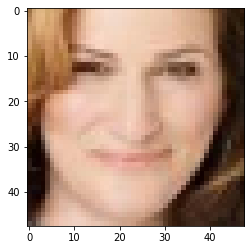

In [6]:
plt.imshow(images[87])

In [7]:
print(ages[122])
print(genders[122])

115
1


In [8]:
#creating numpy arrays of ages,genders and images
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [9]:
#saving images array,ages array and genders arrays in the system
np.save('/kaggle/working/images.npy',images_f)
np.save('/kaggle/working/ages.npy',ages_f)
np.save('/kaggle/working/genders.npy',genders_f)

In [10]:
#Finding the no.of samples in each gender male and female respectively
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


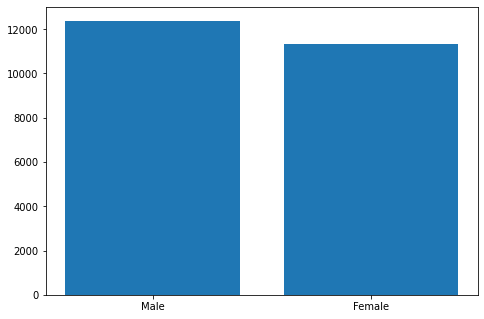

In [11]:
#Ploting the no.of male and female samples
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()


In [12]:
#Finding the no.of samples in each age
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [13]:
#Converting age counts to list
val=values.tolist()
cnt=counts.tolist()


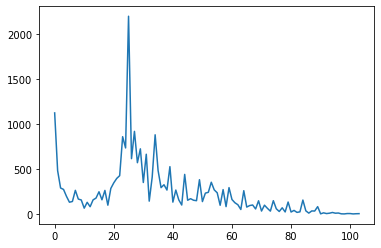

In [14]:
#Plotting the samples according to age
plt.plot(counts)
plt.xlabel=('Ages')
plt.ylabel=('Distribution')

plt.show()

In [15]:
#defining labels for output
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [16]:
#creating list of images from existing one
#For better learning
images_f_2=images_f/255
images_f_2.shape

(23708, 48, 48, 3)

In [17]:
labels_f=np.array(labels)

In [18]:
#Splitting the data set into test and train
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [20]:
y_train[0:5]

array([[56,  0],
       [46,  1],
       [24,  1],
       [25,  1],
       [24,  0]])

In [21]:
#Splitting y_test and y_train further for easy understanding
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [22]:
y_train_2[0][0:5]


array([0, 1, 1, 1, 0])

In [23]:
y_train_2[1][0:5]

array([56, 46, 24, 25, 24])

In [24]:
#defining the model
#activation functions are functions which are added to the neural 
#network to help it identify pattern in data
#it takes the o/p from the previous cell and applies the functions
#and gives it as an input to the next cell

#Dropout is to drop some parameters so that there will be no overfit
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [25]:
def model(input_shape):
    inputs=Input((input_shape))
    
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten=Flatten()(maxp_5)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [26]:
Model=model((48,48,3))

2021-10-31 12:33:16.243613: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 12:33:16.335914: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 12:33:16.336608: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-31 12:33:16.337733: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [27]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [29]:
fle_s='/kaggle/working/Age_Gender_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [30]:
#batch_size if the hyper parameter defines the no.of samples that the model will work before updating the model parameters
#epochs is the hyper paramter defines that the no.of times that the learning algorithm will work for the entire data set
History=Model.fit(x_train,y_train_2,batch_size=64,validation_data=(x_test,y_test_2),epochs=250,callbacks=callback_list)

2021-10-31 12:33:22.729073: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/250


2021-10-31 12:33:24.644854: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


278/278 [==============================] - 11s 15ms/step - loss: 17.3130 - sex_out_loss: 0.7037 - age_out_loss: 16.3169 - sex_out_accuracy: 0.5144 - age_out_accuracy: 0.0482 - val_loss: 17.2845 - val_sex_out_loss: 0.6916 - val_age_out_loss: 16.3447 - val_sex_out_accuracy: 0.5229 - val_age_out_accuracy: 0.0445

Epoch 00001: val_loss improved from inf to 17.28447, saving model to /kaggle/working/Age_Gender_Detection.h5
Epoch 2/250
278/278 [==============================] - 3s 12ms/step - loss: 14.8728 - sex_out_loss: 0.6853 - age_out_loss: 13.9239 - sex_out_accuracy: 0.5380 - age_out_accuracy: 0.0482 - val_loss: 15.5260 - val_sex_out_loss: 0.6647 - val_age_out_loss: 14.5454 - val_sex_out_accuracy: 0.6383 - val_age_out_accuracy: 0.0445

Epoch 00002: val_loss improved from 17.28447 to 15.52600, saving model to /kaggle/working/Age_Gender_Detection.h5
Epoch 3/250
278/278 [==============================] - 3s 11ms/step - loss: 11.6019 - sex_out_loss: 0.6334 - age_out_loss: 10.6096 - sex_out_a

In [31]:
Model.evaluate(x_test,y_test_2)

186/186 [==============================] - 2s 8ms/step - loss: 7.2499 - sex_out_loss: 0.2687 - age_out_loss: 6.2496 - sex_out_accuracy: 0.8804 - age_out_accuracy: 0.0445


[7.249915599822998,
 0.26873552799224854,
 6.249551296234131,
 0.8803779482841492,
 0.04454192519187927]

In [32]:
pred=Model.predict(x_test)
pred[1]

array([[30.490812 ],
       [ 7.0407724],
       [26.150047 ],
       ...,
       [53.383766 ],
       [56.36084  ],
       [30.787722 ]], dtype=float32)

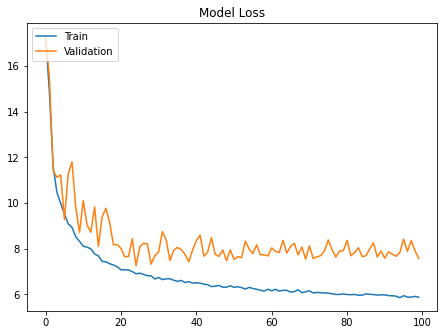

In [33]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

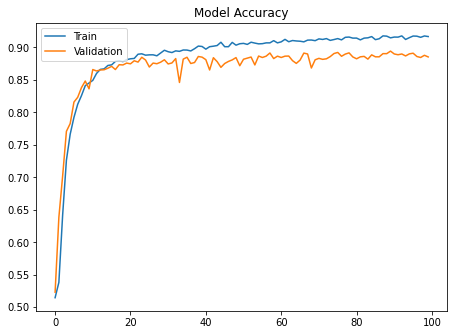

In [34]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

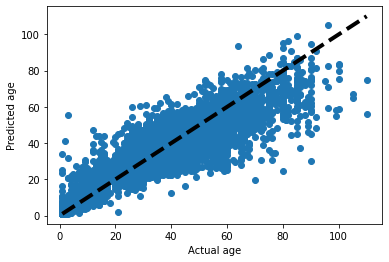

In [35]:
fig,ax=plt.subplots()
ax.scatter(y_test_2[1],pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual age')
ax.set_ylabel('Predicted age')
plt.show()

In [36]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [38]:
report=classification_report(y_test_2[0],Pred_l)

In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3099
           1       0.88      0.86      0.87      2828

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [40]:
results=confusion_matrix(y_test_2[0],Pred_l)

<AxesSubplot:>

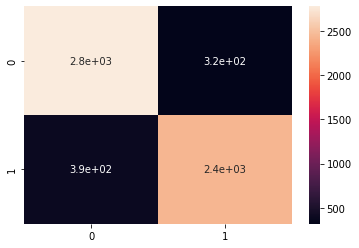

In [41]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [42]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted Gender is "+sex_f[sex])

Predicted Age is 22
Predicted Gender is Female


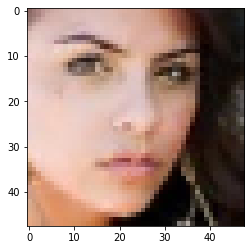

In [43]:
test_image(4,images_f,images_f_2,Model)